## Visualizing the DVS spikes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyNN.spiNNaker as sim
from pyNN.utility.plotting import Figure, Panel
from ast import literal_eval
%matplotlib inline

In [2]:
import sys

### Square Waves

In [ ]:
sys.path.insert(0, './square_waves/')
from diode_square_neg_5Hz import eventos as spikes_neg
from diode_square_pos_5Hz import eventos as spikes_pos

In [ ]:
print(len(spikes_pos))
print(len(spikes_neg))

### Sine Waves

In [ ]:
sys.path.insert(0, './sine_waves/')
from diode_sine_neg_5Hz import eventos as spikes_neg
from diode_sine_pos_5Hz import eventos as spikes_pos

In [ ]:
print(len(spikes_pos))
print(len(spikes_neg))

### Vertical bars

In [3]:
sys.path.insert(0, './vertical_bars/')
from vertical_bars_neg_vel2 import eventos as spikes_neg
from vertical_bars_pos_vel2 import eventos as spikes_pos

In [4]:
print(len(spikes_pos))
print(len(spikes_neg))

16384
16384


### Trim the data (only for vertical bars)

In [5]:
data_neg_trimmed = []
data_pos_trimmed = []

for x in range(0, 40):
    for y in range(0, 40):
        data_neg_trimmed.append(spikes_neg[128*x + y])
        data_pos_trimmed.append(spikes_pos[128*x + y])

In [ ]:
# To keep the variables in the plotting code uniform, run this cell ONLY if NOT using vertical bars
data_neg_trimmed = spikes_neg
data_pos_trimmed = spikes_pos

In [9]:
# A factor to differentiate between different spike bursts
# Have to estimate this on the basis of actual plot
time_between_major_spikes = 1500

### Plot the spikes

We are differentiating spike bursts so that we retain only the first spike/first few from each spike burst, as only the first spikes are actually important.
So, if a spike occurs, and (spike time) - (first_neuron_time) < time_between_major_spikes, it means that this spike was actually in the burst of the first neuron. So we can exclude it/
However, if (spike time) - (first_neuron_time) > time_between_major_spikes, this is hence the first spike of another burst. So we can update first_neuron_time to this value, and add this to our plot

After some testing, I found out that for vertical bars, 1500 is a good value of time_between_major_spikes

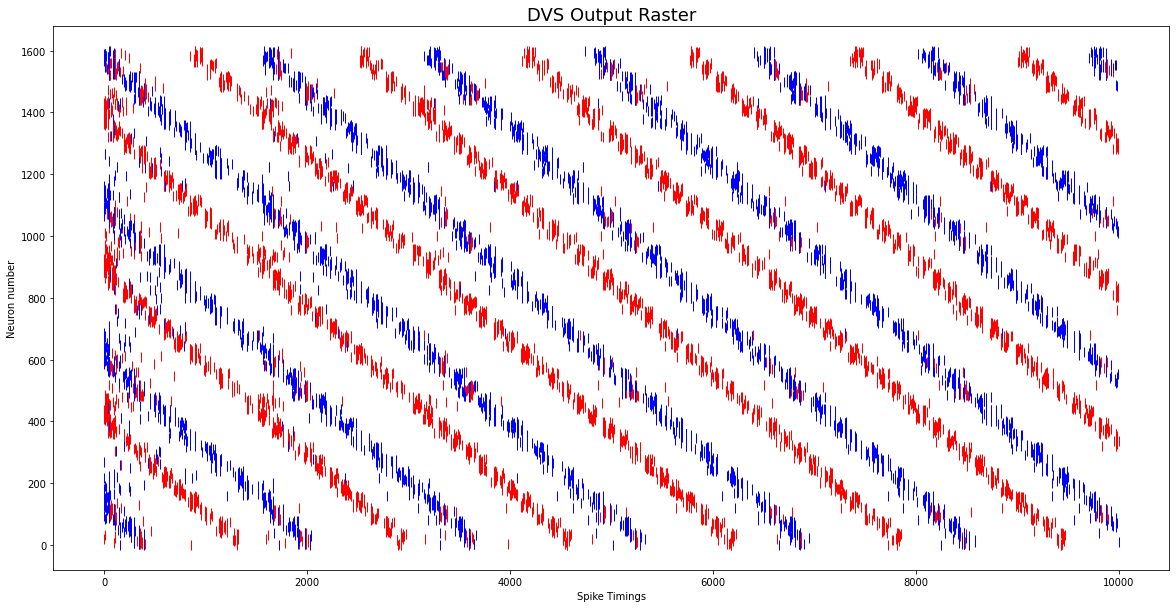

In [10]:
first_spikes_pos = []
first_spikes_neg = []

for k in range(0, 1):
    plt.figure(k, figsize = (20, 10))
    plt.title('DVS Output Raster', fontsize = 18)
    plt.xlabel('Spike Timings')
    plt.ylabel('Neuron number')

    for i in range(len(data_pos_trimmed)):
        neuron = []
        data = []
        cur_time = data_pos_trimmed[i][0]
        neuron.append(i)
        data.append(cur_time)

        for j in range(1, len(data_pos_trimmed[i])):
            if(data_pos_trimmed[i][j] - cur_time >= time_between_major_spikes):
                cur_time = data_pos_trimmed[i][j]
                neuron.append(i)
                data.append(cur_time)
        first_spikes_pos.append(data)
        plt.plot(data, neuron, '|', color = 'red', markersize = 10)

    for i in range(len(data_neg_trimmed)):
        neuron = []
        data = []
        cur_time = data_neg_trimmed[i][0]
        neuron.append(i)
        data.append(cur_time)

        for j in range(1, len(data_neg_trimmed[i])):
            if(data_neg_trimmed[i][j] - cur_time >= time_between_major_spikes):
                cur_time = data_neg_trimmed[i][j]
                neuron.append(i)
                data.append(cur_time)
        first_spikes_neg.append(data)
        plt.plot(data, neuron, '|', color = 'blue', markersize = 10)

In [11]:
for i in range(len(first_spikes_pos)):
    print(first_spikes_pos[i])
    print("\n\n")

[855.68, 2891.473, 4560.854, 6180.25, 7723.928, 9432.867]



[1306.565, 2925.24, 4561.639, 6180.138, 7815.426, 9433.909]



[368.969, 2904.813, 4536.969, 6158.868, 7816.449, 9433.629]



[352.501, 1920.488, 3976.138, 6138.737, 7815.763, 9434.958]



[1307.743, 2926.43, 4561.631, 6179.734, 7815.872, 9443.198]



[407.251, 1988.112, 4563.556, 6182.273, 7817.733, 9435.96]



[352.448, 1986.367, 3607.705, 5241.092, 6859.916, 8480.527]



[101.195, 1784.422, 3607.179, 5244.314, 6862.641, 8484.189]



[359.033, 2926.754, 4562.696, 6172.435, 7816.604, 9396.362]



[354.2, 2926.607, 4550.424, 6142.146, 7816.3, 9434.925]



[371.144, 2008.179, 3609.638, 5255.942, 6860.162, 8482.403]



[349.702, 1985.181, 3575.454, 5237.843, 6859.711, 8477.143]



[1276.271, 2927.041, 4562.538, 6180.854, 7816.011, 9435.189]



[322.123, 1950.818, 3606.348, 5240.859, 6863.341, 8476.51]



[353.008, 1974.259, 4583.365, 6201.732, 7836.469, 9456.624]



[1309.11, 2928.058, 4562.782, 6181.523, 7816.922, 9435.653]




In [ ]:
img = np.zeros((128 * 128, 1))
show_img = np.reshape(img, (128, 128))
plt.imshow(show_img, cmap = 'gray')

In [ ]:
for x in range(0, 1):
    for y in range(0, 40):
        img[128 * x + y] = 255

In [ ]:
show_img = np.reshape(img, (128, 128))
plt.imshow(show_img, cmap = 'gray')